In [ ]:
pip install scikit-learn

KNN


Loading MNIST Data...


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(



Preparing Classifier Training and Validation Data...

KNN Classifier with n_neighbors = 5, algorithm = auto, n_jobs = 10

Pickling the Classifier for Future Use...

Calculating Accuracy of trained Classifier...

Making Predictions on Validation Data...

Calculating Accuracy of Predictions...

Creating Confusion Matrix...

KNN Trained Classifier Confidence:  0.9717142857142858

Accuracy of Classifier on Validation Image Data:  0.9717142857142858

Confusion Matrix: 
 [[701   0   0   0   0   0   1   0   0   0]
 [  0 762   1   0   0   0   0   0   0   1]
 [  3   5 702   2   1   0   1   4   1   1]
 [  0   1   4 701   0   9   0   5   3   4]
 [  1   2   0   0 671   0   0   1   1  20]
 [  2   0   1   8   1 598   5   2   0   1]
 [  3   1   0   0   1   1 655   0   1   0]
 [  0   5   3   0   1   0   0 712   0  10]
 [  2   4   1  11   5  13   4   1 636   6]
 [  0   2   1   6   7   1   0  10   6 664]]


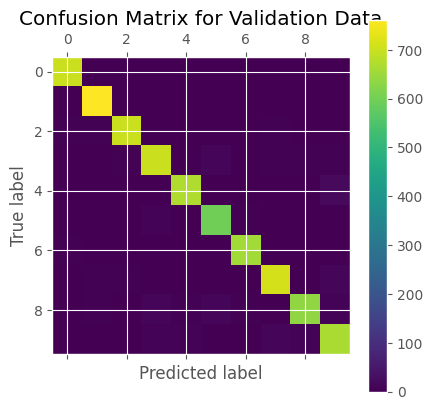


Making Predictions on Test Input Images...

Calculating Accuracy of Trained Classifier on Test Data... 

 Creating Confusion Matrix for Test Data...

Accuracy of Classifier on Test Images:  0.9717142857142858

Confusion Matrix for Test Data: 
 [[701   0   0   0   0   0   1   0   0   0]
 [  0 762   1   0   0   0   0   0   0   1]
 [  3   5 702   2   1   0   1   4   1   1]
 [  0   1   4 701   0   9   0   5   3   4]
 [  1   2   0   0 671   0   0   1   1  20]
 [  2   0   1   8   1 598   5   2   0   1]
 [  3   1   0   0   1   1 655   0   1   0]
 [  0   5   3   0   1   0   0 712   0  10]
 [  2   4   1  11   5  13   4   1 636   6]
 [  0   2   1   6   7   1   0  10   6 664]]


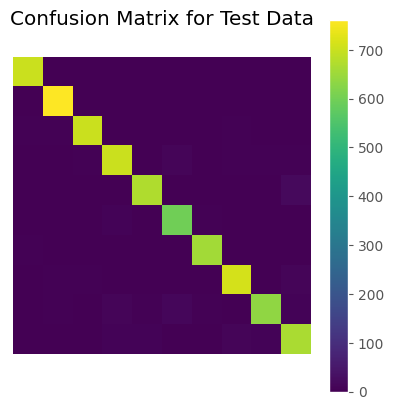

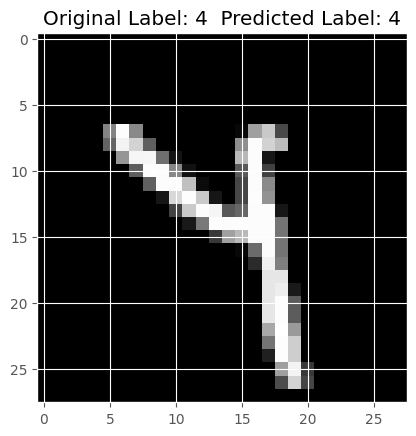

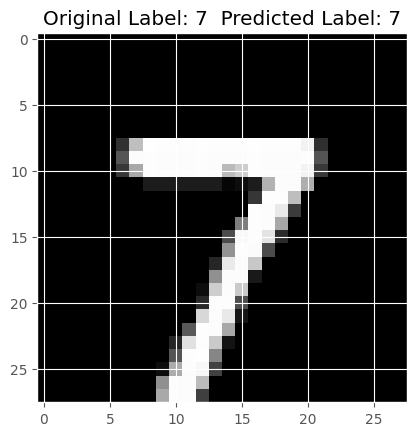

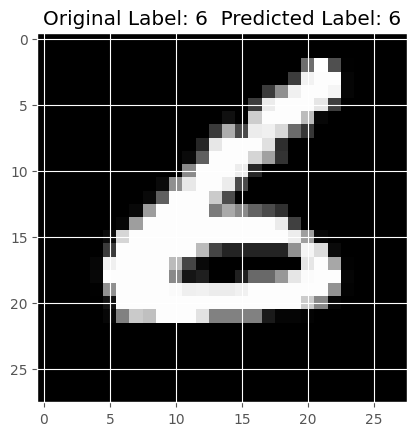

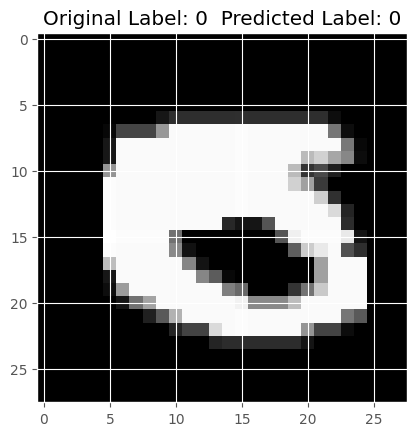

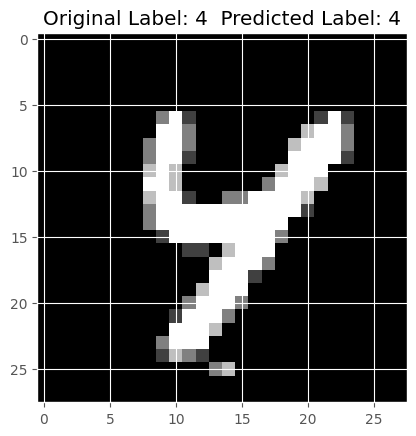

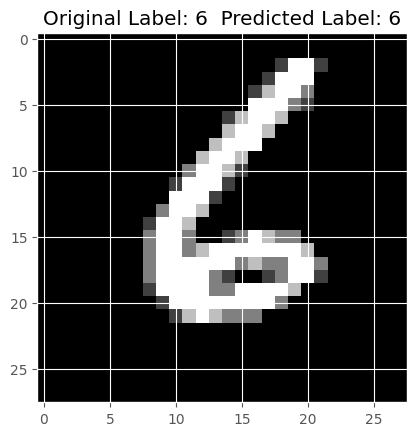

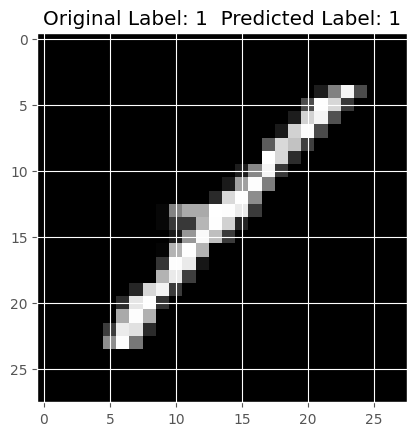

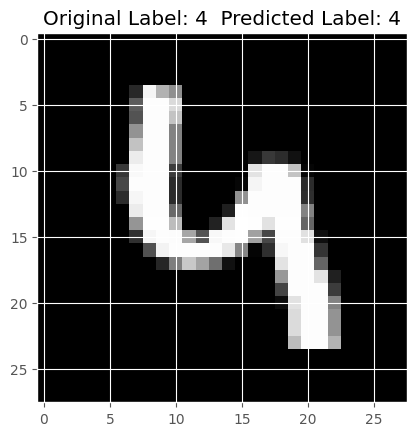

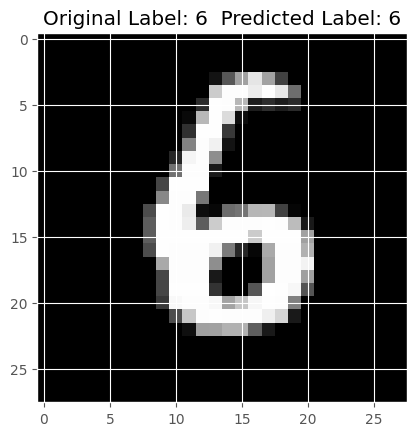

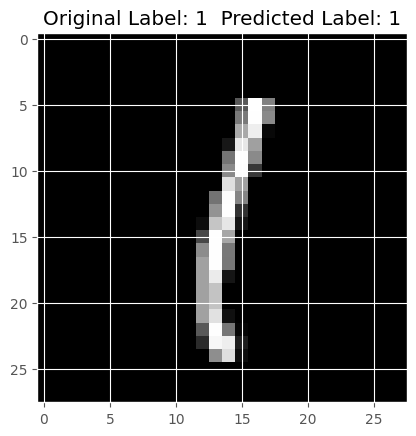

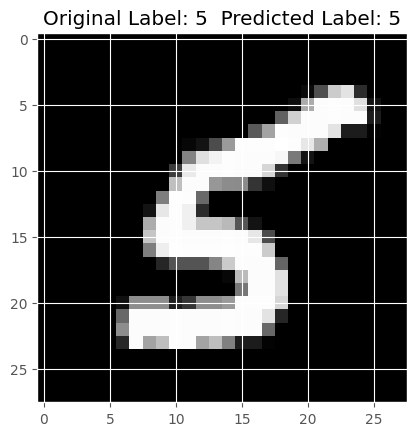

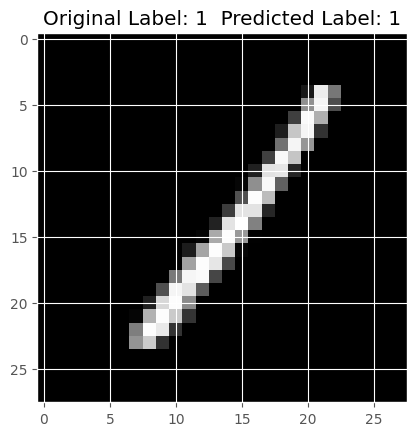

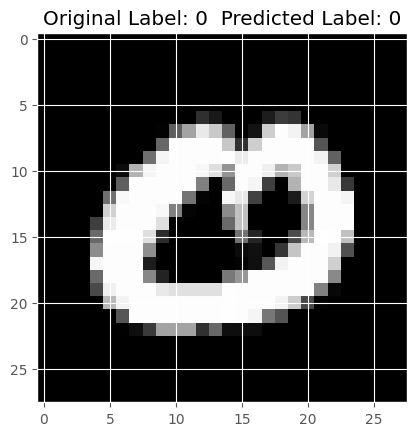

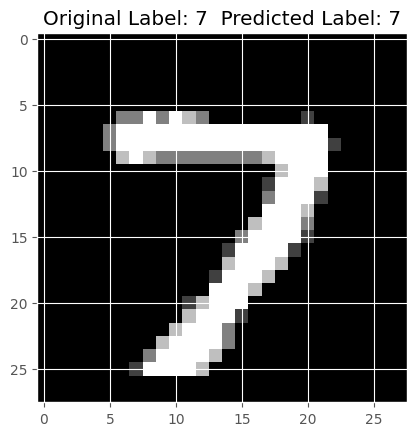

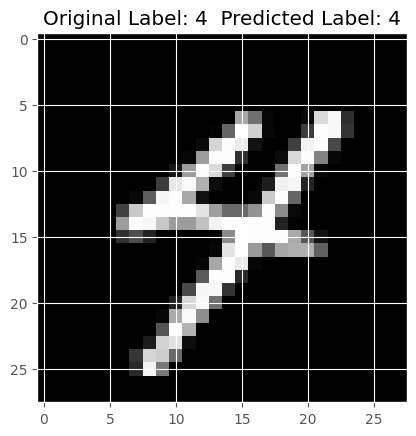

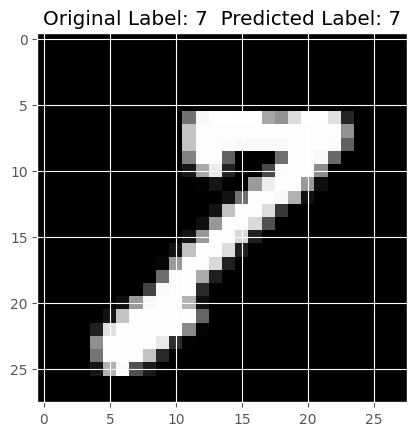

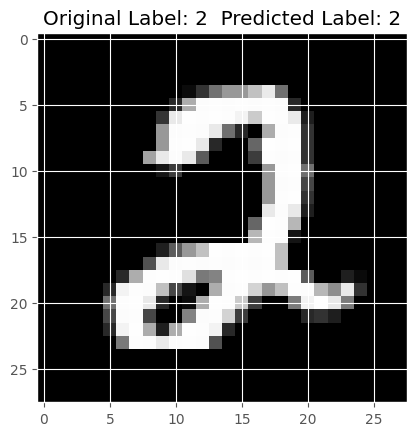

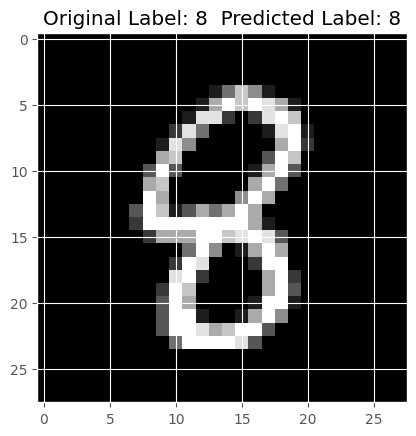

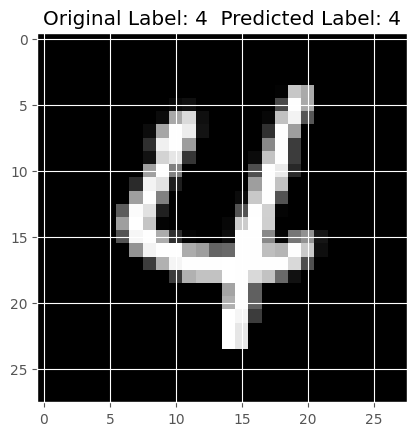

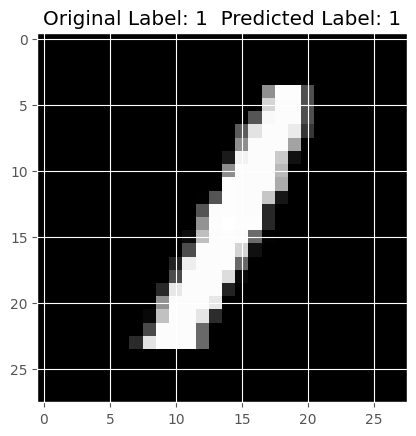

In [1]:
import numpy as np
import pickle
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

# Load MNIST dataset from openml
print('\nLoading MNIST Data...')
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist["data"], mnist["target"]
X = X / 255.0  # Scale the features

# Split the data into training and testing sets
print('\nPreparing Classifier Training and Validation Data...')
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.1)

# Create and train KNN Classifier
print('\nKNN Classifier with n_neighbors = 5, algorithm = auto, n_jobs = 10')
print('\nPickling the Classifier for Future Use...')
clf = KNeighborsClassifier(n_neighbors=5, algorithm='auto', n_jobs=10)
clf.fit(X_train, y_train)

# Save the trained model to a file
with open('MNIST_KNN.pickle', 'wb') as f:
    pickle.dump(clf, f)

# Load the trained model from the file
with open('MNIST_KNN.pickle', 'rb') as f:
    clf = pickle.load(f)

# Evaluate the model
print('\nCalculating Accuracy of trained Classifier...')
confidence = clf.score(X_test, y_test)

print('\nMaking Predictions on Validation Data...')
y_pred = clf.predict(X_test)

print('\nCalculating Accuracy of Predictions...')
accuracy = accuracy_score(y_test, y_pred)

print('\nCreating Confusion Matrix...')
conf_mat = confusion_matrix(y_test, y_pred)

print('\nKNN Trained Classifier Confidence: ', confidence)
print('\nAccuracy of Classifier on Validation Image Data: ', accuracy)
print('\nConfusion Matrix: \n', conf_mat)

# Plot Confusion Matrix Data as a Matrix
plt.matshow(conf_mat)
plt.title('Confusion Matrix for Validation Data')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Show the Test Images with Original and Predicted Labels
print('\nMaking Predictions on Test Input Images...')
X_test_img = X_test.values.reshape((-1, 28, 28))  # Convert to NumPy array and reshape images for plotting
test_labels_pred = clf.predict(X_test)

print('\nCalculating Accuracy of Trained Classifier on Test Data... ')
acc = accuracy_score(y_test, test_labels_pred)

print('\n Creating Confusion Matrix for Test Data...')
conf_mat_test = confusion_matrix(y_test, test_labels_pred)

print('\nAccuracy of Classifier on Test Images: ', acc)
print('\nConfusion Matrix for Test Data: \n', conf_mat_test)

# Plot Confusion Matrix for Test Data
plt.matshow(conf_mat_test)
plt.title('Confusion Matrix for Test Data')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.axis('off')
plt.show()

# Show some random Test Images with Original and Predicted Labels
a = np.random.randint(0, len(X_test_img), 20)
for i in a:
    plt.title('Original Label: {0}  Predicted Label: {1}'.format(y_test.iloc[i], test_labels_pred[i]))
    plt.imshow(X_test_img[i], cmap='gray')
    plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


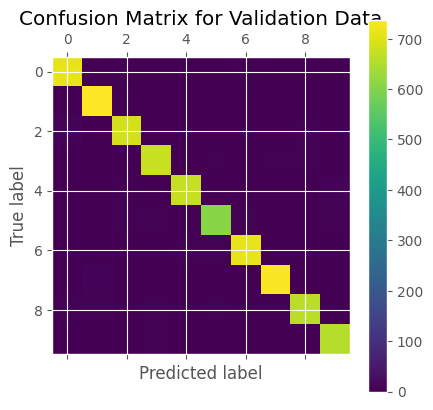


Showing some Test Images with Original and Predicted Labels...


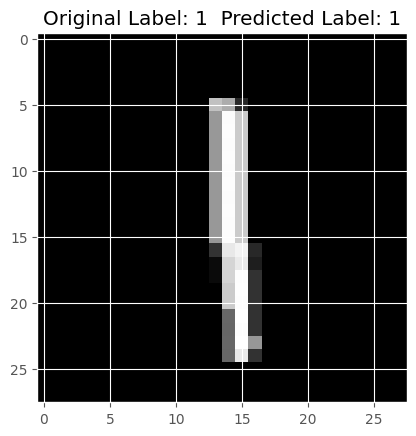

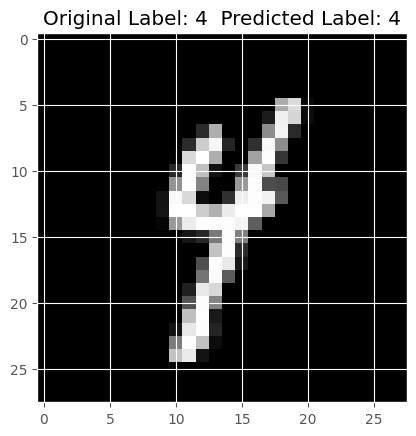

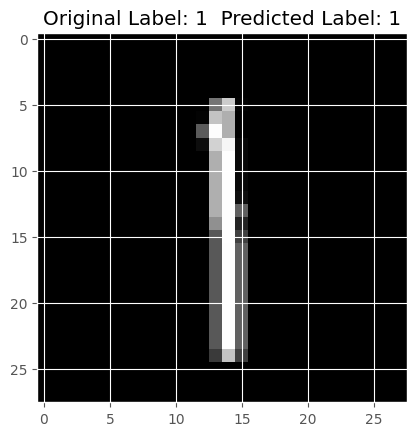

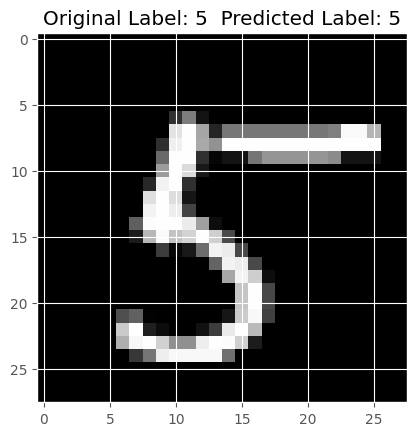

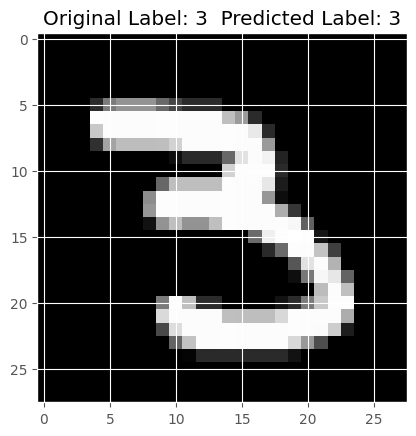

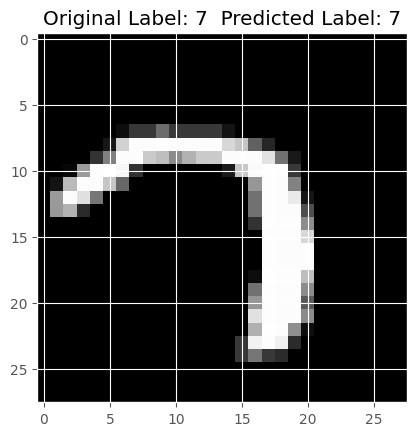

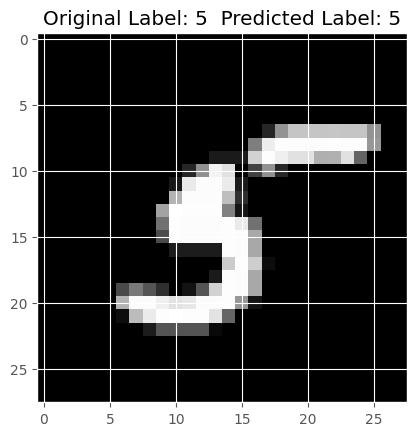

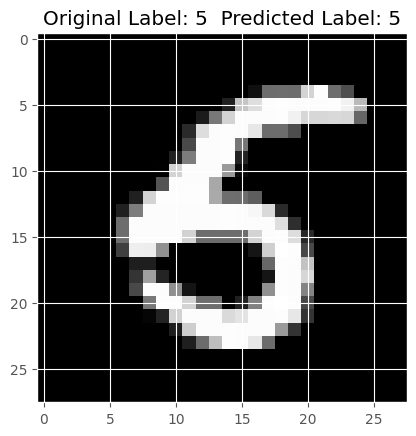

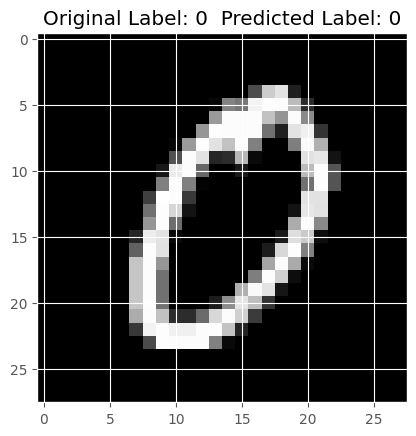

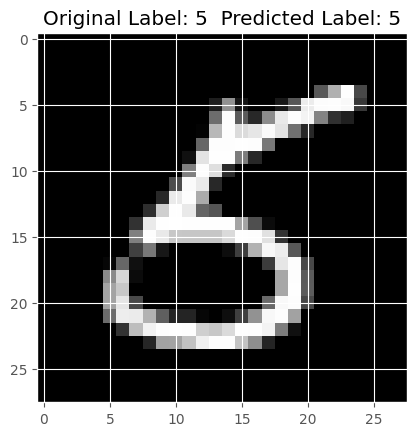

In [2]:
import sys
import numpy as np
import pickle
from sklearn import model_selection, svm
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

# Save all the Print Statements in a Log file.
old_stdout = sys.stdout
log_file = open("summary.log", "w")
sys.stdout = log_file

# Load MNIST Data
print('\nLoading MNIST Data...')
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist["data"], mnist["target"]
X = X / 255.0  # Scale the features

# Features
X = np.array(X)
# Labels
y = np.array(y)

# Prepare Classifier Training and Testing Data
print('\nPreparing Classifier Training and Validation Data...')
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.1)

# Pickle the Classifier for Future Use
print('\nSVM Classifier with gamma = 0.1; Kernel = polynomial')
print('\nPickling the Classifier for Future Use...')
clf = svm.SVC(gamma=0.1, kernel='poly')
clf.fit(X_train, y_train)

with open('MNIST_SVM.pickle', 'wb') as f:
    pickle.dump(clf, f)

pickle_in = open('MNIST_SVM.pickle', 'rb')
clf = pickle.load(pickle_in)

print('\nCalculating Accuracy of trained Classifier...')
acc = clf.score(X_test, y_test)

print('\nMaking Predictions on Validation Data...')
y_pred = clf.predict(X_test)

print('\nCalculating Accuracy of Predictions...')
try:
    accuracy = accuracy_score(y_test, y_pred)
except KeyError as e:
    print(f"KeyError occurred while calculating accuracy_score: {e}")
    accuracy = None

print('\nCreating Confusion Matrix...')
try:
    conf_mat = confusion_matrix(y_test, y_pred)
except KeyError as e:
    print(f"KeyError occurred while creating confusion matrix: {e}")
    conf_mat = None

print('\nSVM Trained Classifier Accuracy: ', acc)
print('\nPredicted Values: ', y_pred)
if accuracy is not None:
    print('\nAccuracy of Classifier on Validation Images: ', accuracy)
else:
    print("Error occurred while calculating accuracy.")

if conf_mat is not None:
    print('\nConfusion Matrix: \n', conf_mat)
    # Plot Confusion Matrix Data as a Matrix
    plt.matshow(conf_mat)
    plt.title('Confusion Matrix for Validation Data')
    plt.colorbar()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
else:
    print("Error occurred while creating confusion matrix.")

# Restore stdout and close the log file
sys.stdout = old_stdout
log_file.close()

# Show some random Test Images with Original and Predicted Labels
print('\nShowing some Test Images with Original and Predicted Labels...')
a = np.random.randint(0, len(X_test), 10)
for i in a:
    two_d = (np.reshape(X_test[i], (28, 28)) * 255).astype(np.uint8)
    plt.title('Original Label: {0}  Predicted Label: {1}'.format(y_test[i], y_pred[i]))
    plt.imshow(two_d, interpolation='nearest', cmap='gray')
    plt.show()


In [ ]:
pip install MNIST

RFC

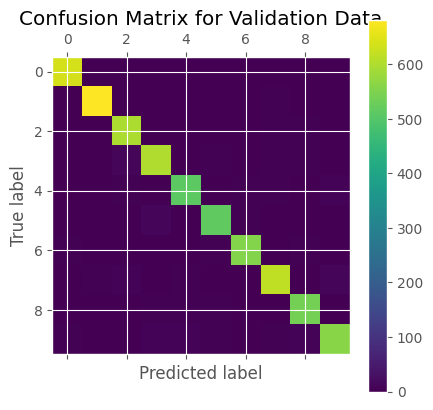

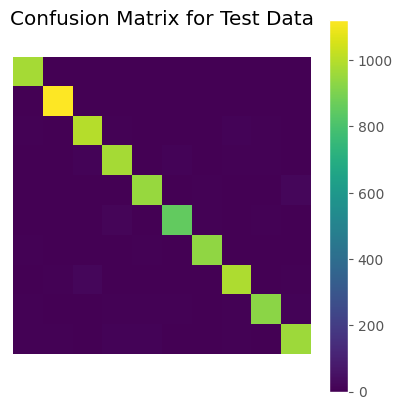


Showing some Test Images with Original and Predicted Labels...


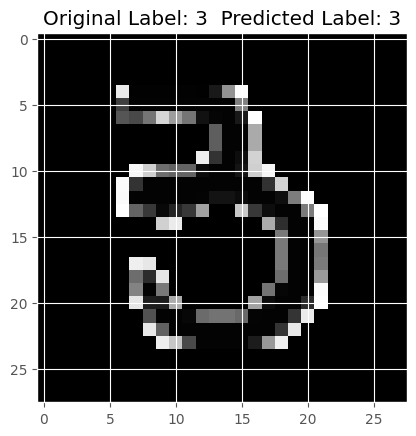

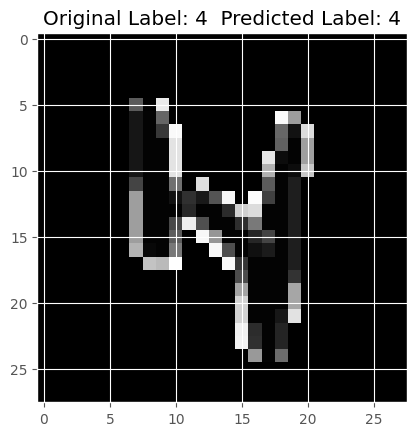

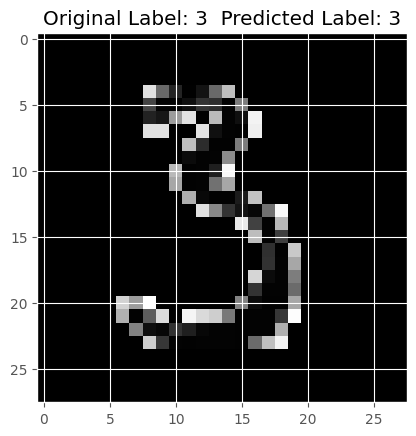

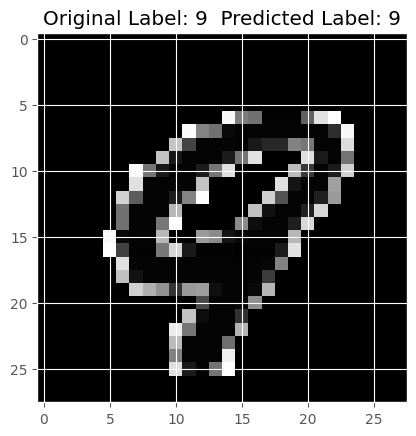

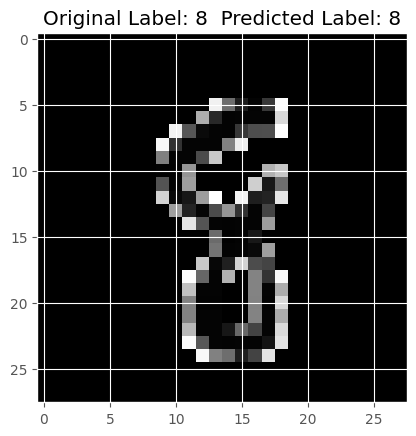

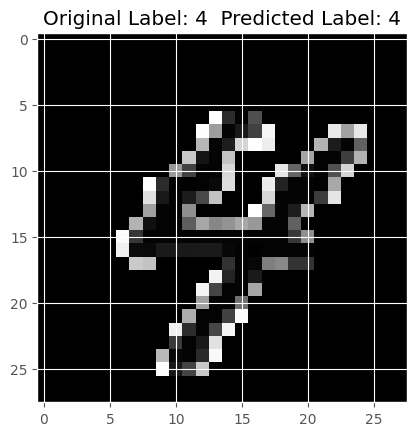

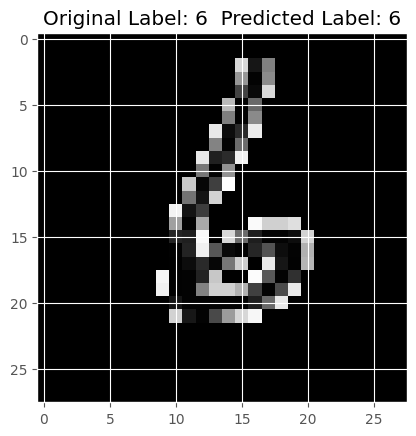

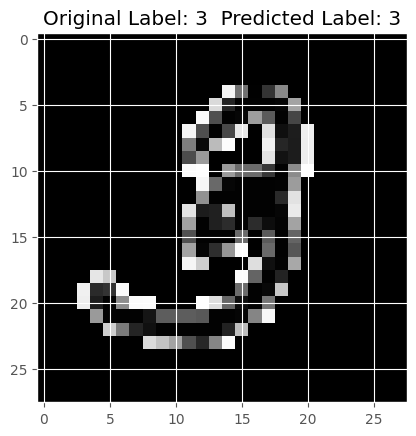

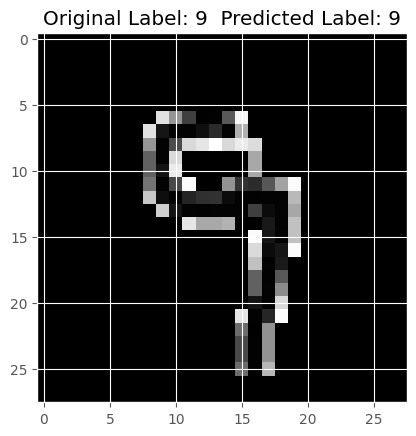

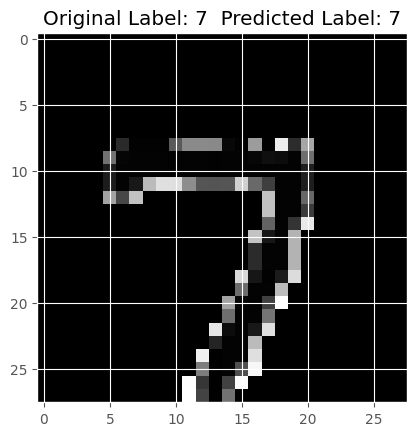

In [3]:
import sys
import numpy as np
import pickle
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from matplotlib import style
from tensorflow.keras.datasets import mnist
style.use('ggplot')

# Save all the Print Statements in a Log file.
old_stdout = sys.stdout
log_file = open("summary.log", "w")
sys.stdout = log_file

print('\nLoading MNIST Data...')
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Features
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# Labels
y_train = np.array(y_train)
y_test = np.array(y_test)

print('\nPreparing Classifier Training and Validation Data...')
X_train, X_val, y_train, y_val = model_selection.train_test_split(X_train, y_train, test_size=0.1)

print('\nRandom Forest Classifier with n_estimators = 100, n_jobs = 10')
print('\nPickling the Classifier for Future Use...')
clf = RandomForestClassifier(n_estimators=100, n_jobs=10)
clf.fit(X_train, y_train)

with open('MNIST_RFC.pickle', 'wb') as f:
    pickle.dump(clf, f)

pickle_in = open('MNIST_RFC.pickle', 'rb')
clf = pickle.load(pickle_in)

print('\nCalculating Accuracy of trained Classifier...')
confidence = clf.score(X_val, y_val)

print('\nMaking Predictions on Validation Data...')
y_pred = clf.predict(X_val)

print('\nCalculating Accuracy of Predictions...')
accuracy = accuracy_score(y_val, y_pred)

print('\nCreating Confusion Matrix...')
conf_mat = confusion_matrix(y_val, y_pred)

print('\nRFC Trained Classifier Confidence: ', confidence)
print('\nPredicted Values: ', y_pred)
print('\nAccuracy of Classifier on Validation Image Data: ', accuracy)
print('\nConfusion Matrix: \n', conf_mat)

# Plot Confusion Matrix Data as a Matrix
plt.matshow(conf_mat)
plt.title('Confusion Matrix for Validation Data')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

print('\nMaking Predictions on Test Input Images...')
test_labels_pred = clf.predict(X_test)

print('\nCalculating Accuracy of Trained Classifier on Test Data... ')
acc = accuracy_score(y_test, test_labels_pred)

print('\nCreating Confusion Matrix for Test Data...')
conf_mat_test = confusion_matrix(y_test, test_labels_pred)

print('\nPredicted Labels for Test Images: ', test_labels_pred)
print('\nAccuracy of Classifier on Test Images: ', acc)
print('\nConfusion Matrix for Test Data: \n', conf_mat_test)

# Plot Confusion Matrix for Test Data
plt.matshow(conf_mat_test)
plt.title('Confusion Matrix for Test Data')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.axis('off')
plt.show()

sys.stdout = old_stdout
log_file.close()

# Show the Test Images with Original and Predicted Labels
print('\nShowing some Test Images with Original and Predicted Labels...')
a = np.random.randint(0, len(X_test), 10)
for i in a:
    two_d = (np.reshape(X_test[i], (28, 28)) * 255).astype(np.uint8)
    plt.title('Original Label: {0}  Predicted Label: {1}'.format(y_test[i], test_labels_pred[i]))
    plt.imshow(two_d, interpolation='nearest', cmap='gray')
    plt.show()


In [4]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dense

class CNN:
    @staticmethod
    def build(width, height, depth, total_classes, Saved_Weights_Path=None):
        # Initialize the Model
        model = Sequential()

        # First CONV => RELU => POOL Layer
        model.add(Conv2D(20, (5, 5), padding="same", input_shape=(depth, height, width)))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), data_format="channels_first"))

        # Second CONV => RELU => POOL Layer
        model.add(Conv2D(50, (5, 5), padding="same"))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), data_format="channels_first"))

        # Third CONV => RELU => POOL Layer
        model.add(Conv2D(100, (5, 5), padding="same"))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), data_format="channels_first"))

        # FC => RELU layers
        model.add(Flatten())
        model.add(Dense(500))
        model.add(Activation("relu"))

        # Using Softmax Classifier for Linear Classification
        model.add(Dense(total_classes))
        model.add(Activation("softmax"))

        # If the saved_weights file is already present i.e model is pre-trained, load that weights
        if Saved_Weights_Path is not None:
            model.load_weights(Saved_Weights_Path)
        return model
# --------------------------------- EOC ------------------------------------


In [5]:
import os
import struct
from array import array


class MNIST(object):
    def __init__(self, path='.'):
        self.path = path

        self.test_img_fname = 't10k-images-idx3-ubyte'
        self.test_lbl_fname = 't10k-labels-idx1-ubyte'

        self.train_img_fname = 'train-images-idx3-ubyte'
        self.train_lbl_fname = 'train-labels-idx1-ubyte'

        self.test_images = []
        self.test_labels = []

        self.train_images = []
        self.train_labels = []

    def load_testing(self):
        ims, labels = self.load(os.path.join(self.path, self.test_img_fname),
                                os.path.join(self.path, self.test_lbl_fname))

        self.test_images = ims
        self.test_labels = labels

        return ims, labels

    def load_training(self):
        ims, labels = self.load(os.path.join(self.path, self.train_img_fname),
                                os.path.join(self.path, self.train_lbl_fname))

        self.train_images = ims
        self.train_labels = labels

        return ims, labels

    @classmethod
    def load(cls, path_img, path_lbl):
        with open(path_lbl, 'rb') as file:
            magic, size = struct.unpack(">II", file.read(8))
            if magic != 2049:
                raise ValueError('Magic number mismatch, expected 2049,'
                                 'got {}'.format(magic))

            labels = array("B", file.read())

        with open(path_img, 'rb') as file:
            magic, size, rows, cols = struct.unpack(">IIII", file.read(16))
            if magic != 2051:
                raise ValueError('Magic number mismatch, expected 2051,'
                                 'got {}'.format(magic))

            image_data = array("B", file.read())

        images = []
        for i in range(size):
            images.append([0] * rows * cols)

        for i in range(size):
            images[i][:] = image_data[i * rows * cols:(i + 1) * rows * cols]

        return images, labels

    @classmethod
    def display(cls, img, width=28, threshold=200):
        render = ''
        for i in range(len(img)):
            if i % width == 0:
                render += '\n'
            if img[i] > threshold:
                render += '@'
            else:
                render += '.'
        return render
